# Visualisations

The aim of this notebook is to import and visualise some of the data to get a better understanding of it.

In [2]:
using NPZ
using EzXML
using StatsPlots

## Importing

In [40]:
# Get the XML metadata file
data_path = "Exp 1/2022-05-10_15-02-25/Record Node 101/"
files_xml = root(readxml("../data/$(data_path)Continuous_Data.openephys"))
recording = firstelement(firstelement(files_xml))

# Format XML data into Dict
files = Dict("processor" => recording["id"], "name" => [], "filename" => [], "position" => [], "bitVolts" => [])
for elem in eachelement(recording)
    push!(files["name"], elem["name"])
    filename = replace(elem["filename"], r"continuous$"=>"")
    push!(files["filename"], "$(filename)npz")
    push!(files["position"], elem["position"])
    push!(files["bitVolts"], elem["bitVolts"])
end
files

Dict{String, Any} with 5 entries:
  "name"      => Any["CH1", "CH2", "CH3", "CH4", "CH5", "CH6", "CH7", "CH8", "C…
  "processor" => "101"
  "filename"  => Any["100_1.npz", "100_2.npz", "100_3.npz", "100_4.npz", "100_5…
  "position"  => Any["1024", "1024", "1024", "1024", "1024", "1024", "1024", "1…
  "bitVolts"  => Any["0.19499999284744262695", "0.19499999284744262695", "0.194…

In [44]:
# Indexing lfp_data[channel, datapoint]

n_datapoints = length(npzread("../data/formatted-lfp/$(data_path)$(files["filename"][1])", ["data"])["data"])
n_channels = length(files["filename"])
lfp_data = Array{Float32}(undef, n_channels, n_datapoints)
for i in 1:length(files["filename"])
    lfp_data[i, :] = npzread("../data/formatted-lfp/$(data_path)$(files["filename"][i])", ["data"])["data"]
end


## Visualisations

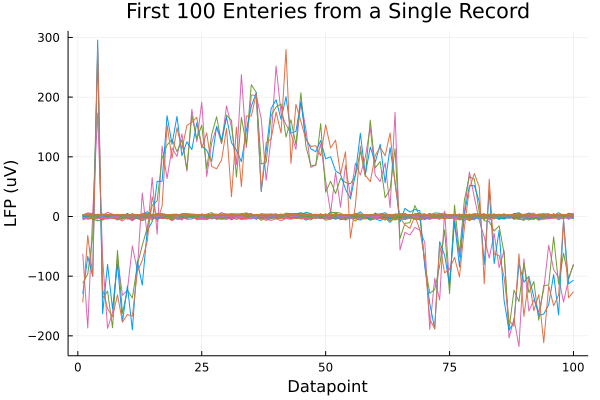

In [49]:
plot(lfp_data[1,1:100], legend=false)
for i in 2:n_channels
    plot!(lfp_data[i,1:100], legend=false)
end
title!("First 100 Enteries from a Single Record")
xlabel!("Datapoint")
ylabel!("LFP (uV)")